In [1]:
# pip install mpld3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

file_path = r"\pokemon.csv"
df_all = pd.read_csv(file_path, encoding='utf-16', sep='\t', header=0)
df = pd.concat([df_all.iloc[:, [2]], df_all.iloc[:, 23:41]], axis=1)
df

,POKEMON,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,1.0,1.0,1.0,0.5,1.00,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
894,Regidrago,1.0,0.5,0.5,0.5,0.50,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
895,Glastrier,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
896,Spectrier,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0


In [3]:
df.columns

Index(['POKEMON', 'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice',
       'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock',
       'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy'],
      dtype='object')

In [4]:
print(df_all.columns.tolist())

['national_number', 'gen', 'POKEMON', 'japanese_name', 'primary_type', 'secondary_type', 'classification', 'percent_male', 'percent_female', 'height_m', 'weight_kg', 'capture_rate', 'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'abilities_0', 'abilities_1', 'abilities_2', 'abilities_hidden', 'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy', 'is_sublegendary', 'is_legendary', 'is_mythical', 'evochain_0', 'evochain_1', 'evochain_2', 'evochain_3', 'evochain_4', 'evochain_5', 'evochain_6', 'gigantamax', 'mega_evolution', 'mega_evolution_alt', 'description']


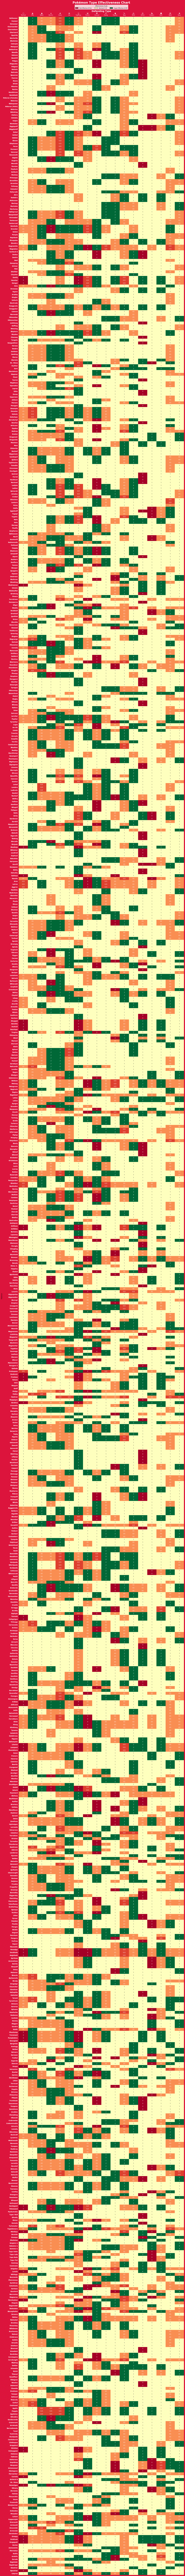

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Segoe UI Emoji'

file_path = r"C:\Users\LENOVO\Downloads\pokemon.csv"
df_all = pd.read_csv(file_path, encoding='utf-16', sep='\t')

type_emoji = {
    'Normal': '⚪\nNormal', 'Fire': '🔥\nFire', 'Water': '💧\nWater',
    'Electric': '⚡\nElectric', 'Grass': '🌿\nGrass', 'Ice': '     ❄️\nIce',
    'Fighting': '🥊\nFighting', 'Poison': '     ☠️\nPoison', 'Ground': '🌍\nGround',
    'Flying': '     🕊️\nFlying', 'Psychic': '🔮\nPsychic', 'Bug': '🐛\nBug',
    'Rock': '🪨\nRock', 'Ghost': '👻\nGhost', 'Dragon': '🐉\nDragon',
    'Dark': '🌑\nDark', 'Steel': '     ⚙️\nSteel', 'Fairy': '✨\nFairy'
}

df = pd.concat([df_all.iloc[:, [2]], df_all.iloc[:, 23:41]], axis=1)
df.columns.values[0] = 'pokemon_name'
df.set_index('pokemon_name', inplace=True)

df.rename(columns=type_emoji, inplace=True)

plt.figure(figsize=(20, len(df) * 0.4), facecolor='crimson')
ax = sns.heatmap(df, annot=True, cmap='RdYlGn', vmin=0, vmax=2, cbar=False)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pokémon Type Effectiveness Chart', pad=90,
          fontsize=20, fontweight='bold', color='white', fontfamily='Verdana')
plt.xlabel('\nDefending Type', fontsize=15, fontweight='bold', color='white', fontfamily='Verdana')
plt.ylabel('Pokémon')

for label in ax.get_xticklabels():
    label.set_fontname('Segoe UI Emoji')
    label.set_fontweight('bold')
    label.set_color('white')

plt.yticks(rotation=0, fontweight='bold', fontfamily='Verdana', color='white')

legend_elements = [
    Patch(facecolor='#a50026', edgecolor='black', label='Not Effective (0.5↓)'),
    Patch(facecolor='#ffffbf', edgecolor='black', label='Normal (1.0)'),
    Patch(facecolor='#006837', edgecolor='black', label='Super Effective (2.0↑)')
]

plt.legend(
    handles=legend_elements,
    title='Effectiveness Scale',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.005),
    ncol=3,
    frameon=True
)
plt.subplots_adjust(top=0.78)
plt.show()
